### Name: Hong Pengfei id: 1002949

# Q1

In [132]:
libsvm_train = './libsvm-3.24/svm-train'
libsvm_pred = './libsvm-3.24/svm-predict'
data_train = 'HW3_data/1/promoters/training.txt'
data_test = 'HW3_data/1/promoters/test.txt'
model = 'output/training.txt.model'
output_file = 'output/out'

In [134]:
! {libsvm_train} -t 0 {data_train} {model}
! {libsvm_pred} {data_test} {model} {output_file}

.....*...*
optimization finished, #iter = 637
nu = 0.024407
obj = -0.903163, rho = 1.532559
nSV = 39, nBSV = 0
Total nSV = 39
Accuracy = 84.375% (27/32) (classification)


### kernel type 0 -- linear: u'*v have acc of 84

In [135]:
! {libsvm_train} -t 1 {data_train} {model}
! {libsvm_pred} {data_test} {model} {output_file}

.*.*
optimization finished, #iter = 186
nu = 0.026157
obj = -0.967852, rho = 0.276119
nSV = 62, nBSV = 0
Total nSV = 62
Accuracy = 81.25% (26/32) (classification)


### kernel type 1 -- polynomial: (gamma*u'*v + coef0)^degree has acc of 81

In [136]:
! {libsvm_train} -t 2 {data_train} {model}
! {libsvm_pred} {data_test} {model} {output_file}

.*
optimization finished, #iter = 96
nu = 0.824736
obj = -32.541976, rho = -0.133095
nSV = 74, nBSV = 25
Total nSV = 74
Accuracy = 90.625% (29/32) (classification)


### kernel type 2 -- radial basis function: exp(-gamma*|u-v|^2) has acc of 91

In [137]:
! {libsvm_train} -t 3 {data_train} {model}
! {libsvm_pred} {data_test} {model} {output_file}

*
optimization finished, #iter = 39
nu = 0.945946
obj = -67.705765, rho = -0.697125
nSV = 71, nBSV = 69
Total nSV = 71
Accuracy = 43.75% (14/32) (classification)


### kernel type of 3 -- sigmoid: tanh(gamma*u'*v + coef0) has acc of 44

### Conclusion: 
### the second kind of kernel has better accuracy on the test set of 90.625%

# Q2

### 1

The dual problem is: \
\begin{equation}
\min_{\alpha} \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) - \sum_{i=1}^N \alpha^i \\
 = \frac{1}{2} (2 \alpha^2_1 + \alpha_2^2 - 2 \alpha_1 \alpha_2) - \alpha_1 - \alpha_2 \\
 s.t. \alpha_i \geq 0  \qquad i=1, 2
\end{equation}
Therefore, we need to
\begin{equation}
min_\alpha \qquad \alpha_1^2 + \frac{1}{2}\alpha_2^2 - \alpha_1\alpha_2 - \alpha_1 - \alpha_2
\end{equation}
by taking partial derivative we get $\alpha_1 = 2, \alpha_2 = 3$ which satisfy the condition $\alpha_{1,2} > 0$\
Therefore, $ w^* = \sum \alpha_i y_i x_i = (-1, 2)$ and geometric margin is $\gamma = \frac{2}{||w||} = \frac{2}{\sqrt{5}}$

### 2

The dual problem is: \
\begin{equation}
\min_{\alpha} \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) - \sum_{i=1}^N \alpha^i \\
 = \frac{1}{2} (2 \alpha^2_1 + \alpha_2^2 - 2 \alpha_1 \alpha_2) - \alpha_1 - \alpha_2 \\
 s.t. \qquad \alpha_i \geq 0  \qquad i=1, 2 \\
 \qquad \alpha_1 - \alpha_2 = 0
\end{equation}
Therefore, we need to
\begin{equation}
min_\alpha \qquad \frac{1}{2}\alpha_1^2 - 2 \alpha_1 
\end{equation}
by taking partial derivative we get $\alpha_1 = \alpha_2 = 2$ which satisfy the condition $\alpha_{1,2} > 0$

Therefore, $ w^* = \sum \alpha_i y_i x_i = (0, 2) $, 

for $\alpha_j > 0$ $b^* = y_i - \sum_{i=1}^{N} \alpha^* y_i (x_i*x_j) = -1$ 

geometric margin is $\gamma = \frac{2}{||w||} = 1$

# Q3

### 1. $K(x, z) = K_1(x, z) K_2(x, z)$  is a kernel function





### Proof  (using kernel definition):
\begin{align}
k_1(x,y) = a(x)^T a(y), \qquad a( z ) = [a_1(z), a_2(z), \ldots a_M(z)] \\
k_2(x,y) = b(x)^T b(y), \qquad b( z ) = [b_1(z), b_2(z), \ldots b_N(z)] 
\end{align}

So $a$ is a function that produces an $M$-dim vector, and $b$ produces an $N$-dim vector.

Next, we just write the product in terms of $a$ and $b$, and perform some regrouping.

\begin{align}
k_{p}(x,y) &= k_1(x,y) k_2(x,y)
\\&= \Big( \sum_{m=1}^M a_m(x) a_m(y) \Big) \Big(  \sum_{n=1}^N b_n(x) b_n(y) \Big)
\\&= \sum_{m=1}^M \sum_{n=1}^N [ a_m(x)  b_n(x) ] [a_m(y) b_n(y)]
\\&= \sum_{m=1}^M \sum_{n=1}^N  c_{mn}( x )  c_{mn}( y )
\\&= c(x)^T c(y)
\end{align}

where $c(z)$ is an $M \cdot N$ -dimensional vector, s.t. $c_{mn}(z) = a_m(z) b_n(z)$.


### 2. $ K(x, z) = aK_1(x, z) + bK_2(x, z)  \qquad a, b > 0 \qquad a, b \in R$, $K(x,z)$ is Kernel function
### Proof (using Mercer's Theorem):
According to Mercer's Thereom, to prove $K(x, z)$ is kernel method is equal to prove its `Gram matrix` A is symmetric and positive semidefinitive.

If $K_1(x,z), K_2(x,z)$ are both Kernel func, their `Gram matrix` are symmetric and positive semidefinitive.


1. To prove $ aK_1(x, z) + bK_2(x, z) $ is symmetric: \
for any matrix M, for any constant $k \in $, $M * k$ is also a symmetric matrix. $\because$ $A_{ij} = A_{ji}$ in $M$, $\therefore$,  $kA_{ij} = kA_{ji}$. Therefore, $aK_1(x,z), bK_2(x,z)$ are all symmetric.\
$\because$ $ (A+B)^T = A^T + B^T $, and if $A^T = A, B^T = B$, $\therefore (A+B)^T = A+B$\
$\because$ $aK_1(x,z), bK_2(x,z)$ are all symmetric, $\therefore K(x, z)$ is symmetric.



2. To prove $ aK_1(x, z) + bK_2(x, z) $ is positive semidefinite:\
Now $K_1(x, z)$ and $K_2(x, z)$ are positive definite matrices, means for all $h \in R_n$ we must have $hK_1h \gt 0$ and $hK_2h \geq 0$. $\because a, b \gt 0 $ $\therefore$ $aK_1(x, z)$ and $bK_2(x,z)$ are all positive semidefinite matrices.\

$\because$ $0 \lt haK_1(x, z)h^T + hbK_2(x, z)h^T = h(K_1(x,z)+K_2(x,z))h^T$, $\therefore$ $ aK_1(x, z) + bK_2(x, z) $ is positive semidefinite.

Therefore, their Gram matrix is both symmetric and P.S.D, $K(x,z)$ is a kernel matrix

### 3. $ K(x, z) = aK_1(x, z) - bK_2(x, z)  \qquad a, b > 0 \qquad a, b \in R$, $K(x,z)$ is not a kernel function
### Counter example:

let $a = 1, b = 2, K_1 = K2$, $\therefore K(x,z) = -K_2(x,z)$.

By Mercer's Theorem, -K_2(x,z) cannot be kernel function because it has a semi-negative kernel matrix.

### 4. $K(x, z) = f(x)f(z),$ where f : Rn -> R be any real valued function of x. This is a kernel.
The proof is trivial: 

$\because$ by kernel defition $K(x,z) = \phi(x)\phi(z)$ where $\phi(y): Rd \rightarrow Rp$, in case of p=1, $K(x,z) = f(x)f(z)$. 

# Q4

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook, tqdm
import sys

### 1.

In [221]:
res = 1
temp = np.random.rand(1000).astype(np.float128)
%time for i in temp: res *= i
print(res)
print()
res = 0
temp = np.log(np.random.rand(1000))
%time for i in temp: res += i
print(np.exp(res.astype(np.float128)))

CPU times: user 359 µs, sys: 0 ns, total: 359 µs
Wall time: 392 µs
3.8429624470446271242e-422

CPU times: user 338 µs, sys: 0 ns, total: 338 µs
Wall time: 343 µs
2.2051243729623736413e-415


### Using log has certain advantages
1. loglikelihood can express a series of multiplication in terms of addition, which is more computationally cheaper. Therefore it only takes more time to calculate multiplication as showed above. 
2. multiplication of a sequence of numbers that is smaller than 1 will stackoverflow and become zero, therefore needs higher precision like float128, however, it only needs float32 to calculate the equation under the log to a certain amount of precision.

### 2.

In [120]:
diabetes = pd.read_csv('HW3_data/4/diabetes_train.csv', header=None)

In [121]:
x, y = diabetes.drop(columns=0), diabetes.loc[:, 0][:,np.newaxis]
x['bias'] = np.ones((len(x), 1))

## formulas

loss:\
\begin{equation}
E = \sum_{i=1}^{n}\log{(  1 + \exp \{-y^{i} (\theta \cdot x^{i} + \theta_0) \}    )} \
\end{equation}

derivative of loss: \
\begin{equation}
\frac{\partial{E^{(t)}}}{\partial{\theta}} =  \frac{-y^{(t)} x^{(t)}}{1 + exp(y^{(t)} (\theta x^{(t)}) )}  \
\end{equation}

loglikelihood = -E

In [122]:
def backward(theta, x, y):
    # x (dim,)
    # y scalar
    gradient = - (y * x) / (1 + np.exp(y * (x.dot(theta) ) ) ) 
    gradient = gradient[:,np.newaxis]
    return gradient

def loss_func(x, y, theta, epoch):
    # x (n, dim)
    # y (n, 1)
    loss = np.sum(np.log( 1 + np.exp( np.multiply(-y, (x.values.dot(theta))))) )
    acc = np.sum(np.sign(x.values.dot(theta)) == y)/ len(y)
    print(f'iteration {iteration} \t loss {loss}, \t accuracy is {acc}')
    return loss, acc

In [123]:
losses = []
accs = []
lr = 0.1
theta = np.random.normal(0, 1, (x.shape[1], 1) )
iterations = 10000
idxs = np.random.choice(len(x), size=iterations)
weights = {}

for iteration, i in enumerate(tqdm_notebook(idxs, file=sys.stdout)):
    xi, yi = x.loc[i,:], y[i]
    gradient = get_gradient(xi, yi, theta)
    theta -= lr * gradient
    if iteration % 100 == 0:
        loss, acc = loss_func(x, y, theta, epoch)
        weights[iteration] = theta
        losses.append(loss)
        accs.append(acc)

iteration 0 	 loss 1255.7914874265118, 	 accuracy is 0.8466666666666667
iteration 100 	 loss 1064.7264973867093, 	 accuracy is 0.845
iteration 200 	 loss 878.5048425331993, 	 accuracy is 0.8686666666666667
iteration 300 	 loss 789.9191186782184, 	 accuracy is 0.8783333333333333
iteration 400 	 loss 732.5139503688447, 	 accuracy is 0.877
iteration 500 	 loss 684.8038194255557, 	 accuracy is 0.882
iteration 600 	 loss 618.4791361525633, 	 accuracy is 0.9
iteration 700 	 loss 560.7993148589188, 	 accuracy is 0.921
iteration 800 	 loss 511.02620864913797, 	 accuracy is 0.9313333333333333
iteration 900 	 loss 518.5662096830745, 	 accuracy is 0.9556666666666667
iteration 1000 	 loss 482.1960980775829, 	 accuracy is 0.9223333333333333
iteration 1100 	 loss 504.33977510783217, 	 accuracy is 0.958
iteration 1200 	 loss 428.61115682087325, 	 accuracy is 0.9526666666666667
iteration 1300 	 loss 418.91806022056255, 	 accuracy is 0.9596666666666667
iteration 1400 	 loss 427.5683875938644, 	 accurac

Text(0.5, 0, 'every 100 iterations')

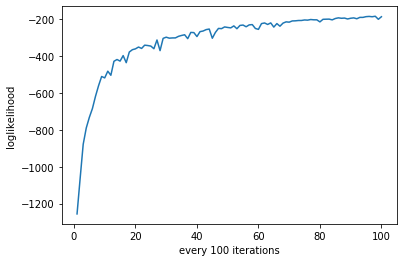

In [124]:
plt.plot(range(1, 101), -1*np.array(losses))
plt.ylabel('loglikelihood ')
plt.xlabel('every 100 iterations')

Text(0.5, 0, 'every 100 iterations')

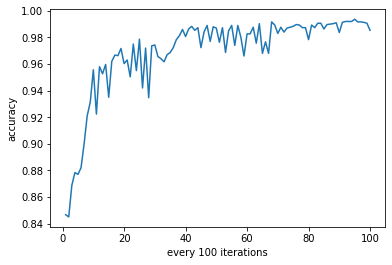

In [125]:
plt.plot(range(1, 101), accs)
plt.ylabel('accuracy')
plt.xlabel('every 100 iterations')

#### saving weights

In [126]:
import pickle
with open('weights.pk', 'wb') as f: pickle.dump(weights, f)

References: 

https://math.stackexchange.com/questions/113842/is-the-product-of-symmetric-positive-semidefinite-matrices-positive-definite

https://www.cse.iitk.ac.in/users/rmittal/prev_course/s14/notes/lec11.pdf

https://stats.stackexchange.com/questions/48509/proof-of-closeness-of-kernel-functions-under-pointwise-product

https://ttic.uchicago.edu/~dmcallester/ttic101-07/lectures/kernels/kernels.pdf

https://www.cs.cmu.edu/~aarti/Class/10701_Spring14/KernelTheory.pdf

# The Homework has finished
# Begin unused code

In [ ]:
# def SGD(x, y, theta, lr=0.1):
#     p = np.random.permutation(len(y))
#     x, y = x.loc[p, :], y[p]
#     for xi, yi in zip(x.values, y):
#         gradient = backward(theta, xi, yi)
#         theta -= lr*gradient
#     return theta
# for epoch in tqdm_notebook(epochs, file=sys.stdout):
#     theta = SGD(x, y, theta, lr)
#     if epoch % 100 == 0: 
#         loss = loss_func(x, y, theta, epoch)
#         weights[epoch] = theta
#         losses.append(loss)

### Proof (using Mercer's Thereom):
According to Mercer's Thereom, to prove $K(x, z)$ is kernel method is equal to prove its `Gram matrix` A is symmetric and positive semidefinitive.

If $K_1(x,z), K_2(x,z)$ are both Kernel func, their `Gram matrix` are symmetric and positive semidefinitive.

let $A_1$, $A_2$ be the kernel matrix of $K_1(x,z)$, $K_2(x,z)$, $\therefore$ we need to prove $A = A_1A_2$ is also positive semidefinite

$\because A_1$ is positive semidefinite, $\therefore A_1 $ can be decomposed into  $A_1 = (Q_1\Lambda_1^{\frac{1}{2}})(Q_1\Lambda_1^{\frac{1}{2}})^T = VV^T$


$\because \forall h \in R_n, \qquad hVBV^Th^T = (hV)A_2(hV)^T > 0$, $\therefore VA_2V^T$ is positive semidefinitive  .\

$\because det(VA_2V^T−𝜆𝐼) = det(VV^TA_2−𝜆𝐼)$ $\therefore VA_2V^T$ has the same positive eigenavalues as $VV^TA_2$, $\therefore A = A_1A_2$ is also positive semidefinite.